In [207]:
import numpy as np
import numpy as np
import scipy as sc
from scipy import linalg
import matplotlib as plt
import numpy as np
from numpy import genfromtxt
from scipy.stats import beta
from scipy.stats import norm
from scipy.stats import gamma
from scipy.stats import invgamma
import matplotlib.pyplot as plt
from sympy import Matrix
from datetime import datetime
import seaborn as sns
import math
import time
ordqz = sc.linalg.ordqz
svd = sc.linalg.svd
import pandas as pd
resh  = np.reshape
norm = np.random.standard_normal
zeros = np.zeros
import scipy as sc
inv =  sc.linalg.inv
resh = np.reshape
m = np.matmul
eig = sc.linalg.eig
det = np.linalg.det

In [208]:


def Solve_ZLB(para):
    # Define Variables
    psi = para[0];epsilon = para[1];alpha = para[2];sigma = para[3];rho = para[4];rho_k = para[5];delta = para[6];n1 = para[7];n2 = para[8];phi_b = para[9];phi_s= para[10];theta = para[11];phi_x = para[12];phi_pi = para[13];phi_t =para[14];rh0= para[15];h_w = para[16];h_r = 1-h_w;p_u = para[17];p_r = para[18];p_s = para[19];p_e = para[20];p_a = para[21];p_r_star = para[22];


    r = 0;a = 1;s = 2;u = 3;e = 4;
    r_sh = 0;a_sh = 1;s_sh = 2;u_sh = 3;e_sh = 4;i_sh = 5
    b = 5;k = 6;q_km = 7;b_km = 8;w = 9;tau = 10;b_k = 11;i = 12
    y = 13;pi = 14;q = 15;q_k = 16
    C_bar = .6;K_bar = .4;Y_bar = 1;c1 = Y_bar/(Y_bar-K_bar);c2 = K_bar/(Y_bar-K_bar)
    # Set up nuisance parameters
    alpha_tilde = (1-(1-.99*theta)*(1-theta))**-1;gam = alpha*(psi**-1)*(-epsilon);v_1 = alpha_tilde*.99*theta;v_2 = alpha_tilde*((1-.99*theta)/(1-gam))
    phi_1 = (1-alpha*(psi**-1));phi_2 = alpha*(psi**-1)*delta*c1;phi_3 = alpha+(psi**-1)*alpha*delta*c2
    phi_4 = alpha*(psi**-1)*h_w;Q = (C_bar**delta)/((sigma*K_bar)**(n2))
    # Generate Matrices
    GAM0 = np.zeros([17,17]);GAM1 = np.zeros([17,17]);PSI = np.zeros([17,6])    
    # EQ 0 Goverment Bond Demand
    GAM0[b,b] =1
    GAM1[b,b] =1
    GAM0[b,q] = (1-rho)
    GAM0[b,pi] =1
    GAM0[b,tau] = 1
    GAM0[b,s] = 1
    # EQ 1 Capital Evolution 
    GAM0[k,k] =1
    GAM1[k,k] =1-sigma
    GAM0[k,b_km] =-1*( 1-2*sigma)
    GAM0[k,q_km] =-1*(1-2*sigma)
    GAM1[k,b_km] = -2*sigma
    GAM1[k,q_km] = -2*sigma
    GAM1[k,e] = -2*sigma
    # EQ 2 tech shock
    GAM0[a,a] = 1
    GAM1[a,a] = p_a
    PSI[a,a_sh] = .2
    # EQ 3 Seinorage shock
    GAM0[s,s] = 1 
    GAM1[s,s] = p_s
    PSI[s,s_sh] = .2
    # EQ 4 Demand shock
    GAM0[r,r] = 1
    GAM0[r,i] = p_r_star
    GAM1[r,r] = p_r 
    PSI[r,r_sh] = .2 
    # EQ 5 Cost Push shock
    GAM0[u,u] = 1 
    GAM1[u,u] = p_u 
    PSI[u,u_sh] = .2 
    # EQ 7 Investment "Credit Freeze" shock
    GAM0[e,e] = 1 
    GAM1[e,e] = p_e 
    PSI[e,e_sh] = .2 
    # EQ 8 coporate bond price lag
    GAM0[q_km,q_km] = 1
    GAM1[q_km,q_k] = 1
    # EQ 9 coporate bond demand lag
    GAM0[b_km,b_km] = 1
    GAM1[b_km,b_k] = 1
    # EQ 10 Money/IS equation
    GAM1[y,y] = c1
    GAM1[y,k] = c2
    GAM0[y,y] = c1*delta**-1
    GAM0[y,k] = -c2*delta**-1
    GAM0[y,pi] = delta**-1
    GAM0[y,tau] = -h_r*delta**-1
    #GAM1[y,i] = delta**-1
    GAM1[y,r] = -delta**-1
    # EQ 11 Phillips Curve
    GAM1[pi,pi] = 1
    GAM0[pi,pi] =v_1
    GAM1[pi,w] = -v_2*phi_1
    GAM1[pi,y] = -v_2*phi_2
    GAM1[pi,k] = v_2*phi_3
    GAM0[pi,tau] = v_2*phi_4
    GAM0[pi,u] =1
    # EQ 12 Gov Bond Pricing
    GAM1[q,q] = n1
    GAM1[q,b] = n1
    GAM1[q,y] = -delta*c1
    GAM1[q,k] = delta*c2
    GAM0[q,y] = .99*delta*c1
    GAM0[q,k] = -.99*delta*c2
    GAM0[q,pi] = .99*delta
    GAM0[q,tau] = h_r
    GAM0[q,q] = -.99*rho
    # EQ 13 Corp Bond Pricing
    GAM1[q_k,q] = 1-n2-Q**-1
    GAM1[q_k,b] = n2
    GAM1[q_k,y] = -delta*c1*(Q**-1)
    GAM1[q_k,k] = delta*c2*(Q**-1)
    GAM0[q_k,y] = .99*delta*c1*.994*(Q**-1)
    GAM0[q_k,k] = -.99*delta*c2*.994*(Q**-1)
    GAM0[q_k,pi] = .99*delta*.994*(Q**-1)
    GAM0[q_k,tau] = h_r*.994*(Q**-1)
    GAM0[q_k,q_k] = -(.99*rho_k*.994-.99*rho_k*.42*.006)*(Q**-1)
    # EQ 14 Monetary Policy
    GAM0[i,i] = 1
    GAM1[i,i] = 1
    PSI[i,i_sh] =.2
    # EQ 15 Wages
    GAM0[w,w] = 1-alpha*psi
    GAM0[w,q_k] = -2*alpha*psi
    GAM0[w,b_k] = -2*alpha*psi
    GAM1[w,q_k] = -2*alpha*psi
    GAM1[w,b_k] = -2*alpha*psi
    GAM0[w,e] = -2*alpha*psi
    GAM0[w,y] = -(delta-psi)*c1
    GAM0[w,a] = -psi
    GAM0[w,k] = delta*c2 
    GAM0[w,tau] = h_w 
    # EQ 16 Tax LOM
    GAM0[tau,tau] =1    
    GAM0[tau,b] = -phi_b
    GAM0[tau,q] = -phi_b 
    GAM0[tau,s] = phi_s 
    GAM1[tau,tau] = phi_t 

    # EQ 17 Corporate Bond Demand
    GAM0[b_k,b_k] = 1
    GAM0[b_k,w] = -1
    GAM1[b_k,q_k] = 1
    GAM1[b_k,b_k] = 1
    GAM0[b_k,y] = -(1-alpha)**-1
    GAM0[b_k,a] = (1-alpha)**-1
    GAM0[b_k,k] = (1-alpha)**-1
    GAM0[b_k,e] =  1
    GAM0[b_k,q_k] = 1

    n_s = 13;n_j = 4
    VV = np.zeros(17)
    F = m(inv(GAM0),GAM1);e_vals, e_vecs = eig(F)
    for i in range(17):
        VV[i] =  ((np.real(e_vals[i])**2)+(np.imag(e_vals[i])**2))**.5
    idx = np.argsort(VV)
    H = e_vecs;H = inv(e_vecs[:,idx]);G_tilde = m(H,PSI)
    # Partion Matrices (Imaginary Component)
    H11 = H[0:n_s,0:n_s];H12 = H[0:n_s,n_s:];H21 = H[n_s:,0:n_s];H22 = H[n_s:,n_s:]
    F11 = np.real(F[0:n_s,0:n_s]);F22 = np.real(F[0:n_s,n_s:]);
    L1 = np.diagflat(e_vals[idx][0:n_s]);L2 = np.diagflat(e_vals[idx][n_s:])
    G1 = PSI[0:n_s,:];G2 = PSI[n_s:,:];G1_tilde= G_tilde[0:n_s,:];G2_tilde= G_tilde[n_s:,:]
    try:
        Q = inv(H22)
    except:
        H22+=1e-2
        Q = inv(H22)

    # Coef for Jumps
    B = np.real(m(m(-inv(Q),inv(L2)),G2_tilde));A = np.real(m(-inv(Q),H21))
    # Coef for States
    C = np.real(F11 -m(F22,m(Q,H21)));D = np.real(m(F22,m(m(-Q,inv(L2)),G2_tilde))+G1)
    # Y_t = A*X_t + B*eps_t 
    # X_t = C*X_t-1 + D*eps_t    
    #print(np.count_nonzero(abs(VV)>=1));print('sien on output: ', A[0,s]>0);print('sien on inflation: ', A[1,s]>0);print('sien on gov bond price: ', A[2,s]>0);print('sien on private bond price: ', A[3,s]>0)
    
    A1 = A[:,5:];A2 = A[:,0:5];C1 = C[5:,5:];C2 = C[5:,0:5]
    A1[:,7] = 0;C1[5:,7] = 0 

    R = np.zeros([5,5])
    R[0,0] =p_r
    R[1,1] =p_a
    R[2,2] =p_s
    R[3,3] =p_u
    R[4,4] =p_e

    # Learning Block
    A11 = A[:,0:5]
    A12 = A[:,5:]
    C11 = C[5:,0:5]
    C12 = C[5:,5:]
    

    
    return R,A1,A2,C1,C2,PSI[:,:-1],A11,A12,C11,C12


In [209]:
###### Baseline Model With Adaptive Sampler & Random Block ##################### 
Thetasim_KF = np.load('/Users/ajay/Documents/Research Files/FTTPL/PostDIST.npy')
AA_KF = np.load('/Users/ajay/Documents/Research Files/FTTPL/Acceptance.npy')
logpost_KF = np.load('/Users/ajay/Documents/Research Files/FTTPL/logpost.npy')
likic_KF = np.load('/Users/ajay/Documents/Research Files/FTTPL/likely.npy')
ERRS_KF = np.load('/Users/ajay/Documents/Research Files/FTTPL/ERRS.npy')

# No Random Block
Thetasim_KF_1 = np.load('/Users/ajay/Documents/Research Files/FTTPL/PostDIST_1.npy')
AA_KF_1 = np.load('/Users/ajay/Documents/Research Files/FTTPL/Acceptance_1.npy')
logpost_KF_1 = np.load('/Users/ajay/Documents/Research Files/FTTPL/logpost_1.npy')
likic_KF_1 = np.load('/Users/ajay/Documents/Research Files/FTTPL/likely_1.npy')
ERRS_KF_1 = np.load('/Users/ajay/Documents/Research Files/FTTPL/ERRS_1.npy')
    
####### Particle Filter Model With Adaptive Sampler &  Random Block ##################### 
Thetasim_PF = np.load('/Users/ajay/Documents/Research Files/FTTPL/PostDIST_PF.npy')
AA_PF = np.load('/Users/ajay/Documents/Research Files/FTTPL/Acceptance_PF.npy')
logpost_PF = np.load('/Users/ajay/Documents/Research Files/FTTPL/logpost_PF.npy')
likic_PF = np.load('/Users/ajay/Documents/Research Files/FTTPL/likely_PF.npy')
ERRS_PF = np.load('/Users/ajay/Documents/Research Files/FTTPL/ERRS_PF.npy')

# No Random Block
Thetasim_PF_1 = np.load('/Users/ajay/Documents/Research Files/FTTPL/PostDIST_PF.npy')
AA_PF_1 = np.load('/Users/ajay/Documents/Research Files/FTTPL/Acceptance_PF.npy')
logpost_PF_1 = np.load('/Users/ajay/Documents/Research Files/FTTPL/logpost_PF.npy')
likic_PF_1 = np.load('/Users/ajay/Documents/Research Files/FTTPL/likely_PF.npy')
ERRS_PF_1 = np.load('/Users/ajay/Documents/Research Files/FTTPL/ERRS_PF.npy')




Thetasim_PF = np.vstack([Thetasim_PF_1[0:100000],Thetasim_PF[0:80000]])
Thetasim_KF = np.vstack([Thetasim_KF_1[0:100000],Thetasim_KF[0:80000]])


In [210]:
m = np.matmul;resh = np.reshape;inv = np.linalg.inv;arr = np.array


In [211]:
def Solve_ZLB(para):
    m = np.matmul
    inv = np.linalg.inv

    # Define Variables
    psi = para[0];epsilon = para[1];alpha = para[2];sigma = para[3];rho = para[4];rho_k = para[5];delta = para[6];n1 = para[7];n2 = para[8];phi_b = para[9];phi_s= para[10];theta = para[11];phi_x = para[12];phi_pi = para[13];phi_t =para[14];rh0= para[15];h_w = para[16];h_r = 1-h_w;p_u = para[17];p_r = para[18];p_s = para[19];p_e = para[20];p_a = para[21];p_r_star = para[22];
    p_r_star = para[22];sig_u =para[23];sig_r = para[24];sig_s = para[25];sig_e = para[26];sig_a = para[27];sig_r_star = para[28]
    h_r = 1-h_w;
    r = 0;a = 1;s = 2;u = 3;e = 4;
    r_sh = 0;a_sh = 1;s_sh = 2;u_sh = 3;e_sh = 4;i_sh = 5
    b = 5;k = 6;q_km = 7;b_km = 8;w = 9;tau = 10;b_k = 11;i = 12
    y = 13;pi = 14;q = 15;q_k = 16
    C_bar = .6;K_bar = .4;Y_bar = 1;c1 = Y_bar/(Y_bar-K_bar);c2 = K_bar/(Y_bar-K_bar)
    # Set up nuisance parameters
    alpha_tilde = (1-(1-.99*theta)*(1-theta))**-1;gam = alpha*(psi**-1)*(-epsilon);v_1 = alpha_tilde*.99*theta;v_2 = alpha_tilde*((1-.99*theta)/(1-gam))
    phi_1 = (1-alpha*(psi**-1));phi_2 = alpha*(psi**-1)*delta*c1;phi_3 = alpha+(psi**-1)*alpha*delta*c2
    phi_4 = alpha*(psi**-1)*h_w;Q = (C_bar**delta)/((sigma*K_bar)**(n2))
    # Generate Matrices
    GAM0 = np.zeros([17,17]);GAM1 = np.zeros([17,17]);PSI = np.zeros([17,6])    
    # EQ 0 Goverment Bond Demand
    GAM0[b,b] =1
    GAM1[b,b] =1
    GAM0[b,q] = (1-rho)
    GAM0[b,pi] =1
    GAM0[b,tau] = 1
    GAM0[b,s] = 1
    # EQ 1 Capital Evolution 
    GAM0[k,k] =1
    GAM1[k,k] =1-sigma
    GAM0[k,b_km] =-1*( 1-2*sigma)
    GAM0[k,q_km] =-1*(1-2*sigma)
    GAM1[k,b_km] = -2*sigma
    GAM1[k,q_km] = -2*sigma
    GAM1[k,e] = -2*sigma
    # EQ 2 tech shock
    GAM0[a,a] = 1
    GAM1[a,a] = p_a
    PSI[a,a_sh] = sig_a
    # EQ 3 Seinorage shock
    GAM0[s,s] = 1 
    GAM1[s,s] = p_s
    PSI[s,s_sh] = sig_s
    # EQ 4 Demand shock
    GAM0[r,r] = 1
    GAM0[r,i] = p_r_star
    GAM1[r,r] = p_r 
    PSI[r,r_sh] = sig_r 
    # EQ 5 Cost Push shock
    GAM0[u,u] = 1 
    GAM1[u,u] = p_u 
    PSI[u,u_sh] = sig_u 
    # EQ 7 Investment "Credit Freeze" shock
    GAM0[e,e] = 1 
    GAM1[e,e] = p_e 
    PSI[e,e_sh] = sig_e 
    # EQ 8 coporate bond price lag
    GAM0[q_km,q_km] = 1
    GAM1[q_km,q_k] = 1
    # EQ 9 coporate bond demand lag
    GAM0[b_km,b_km] = 1
    GAM1[b_km,b_k] = 1
    # EQ 10 Money/IS equation
    GAM1[y,y] = c1
    GAM1[y,k] = c2
    GAM0[y,y] = c1*delta**-1
    GAM0[y,k] = -c2*delta**-1
    GAM0[y,pi] = delta**-1
    GAM0[y,tau] = -h_r*delta**-1
    #GAM1[y,i] = delta**-1
    GAM1[y,r] = -delta**-1
    # EQ 11 Phillips Curve
    GAM1[pi,pi] = 1
    GAM0[pi,pi] =v_1
    GAM1[pi,w] = -v_2*phi_1
    GAM1[pi,y] = -v_2*phi_2
    GAM1[pi,k] = v_2*phi_3
    GAM0[pi,tau] = v_2*phi_4
    GAM0[pi,u] =1
    # EQ 12 Gov Bond Pricing
    GAM1[q,q] = n1
    GAM1[q,b] = n1
    GAM1[q,y] = -delta*c1
    GAM1[q,k] = delta*c2
    GAM0[q,y] = .99*delta*c1
    GAM0[q,k] = -.99*delta*c2
    GAM0[q,pi] = .99*delta
    GAM0[q,tau] = h_r
    GAM0[q,q] = -.99*rho
    # EQ 13 Corp Bond Pricing
    GAM1[q_k,q] = 1-n2-Q**-1
    GAM1[q_k,b] = n2
    GAM1[q_k,y] = -delta*c1*(Q**-1)
    GAM1[q_k,k] = delta*c2*(Q**-1)
    GAM0[q_k,y] = .99*delta*c1*.994*(Q**-1)
    GAM0[q_k,k] = -.99*delta*c2*.994*(Q**-1)
    GAM0[q_k,pi] = .99*delta*.994*(Q**-1)
    GAM0[q_k,tau] = h_r*.994*(Q**-1)
    GAM0[q_k,q_k] = -(.99*rho_k*.994-.99*rho_k*.42*.006)*(Q**-1)
    # EQ 14 Monetary Policy
    GAM0[i,i] = 1
    GAM1[i,i] = 1
    PSI[i,i_sh] =sig_r_star
    # EQ 15 Wages
    GAM0[w,w] = 1-alpha*psi
    GAM0[w,q_k] = -2*alpha*psi
    GAM0[w,b_k] = -2*alpha*psi
    GAM1[w,q_k] = -2*alpha*psi
    GAM1[w,b_k] = -2*alpha*psi
    GAM0[w,e] = -2*alpha*psi
    GAM0[w,y] = -(delta-psi)*c1
    GAM0[w,a] = -psi
    GAM0[w,k] = delta*c2 
    GAM0[w,tau] = h_w 
    # EQ 16 Tax LOM
    GAM0[tau,tau] =1    
    GAM0[tau,b] = -phi_b
    GAM0[tau,q] = -phi_b 
    GAM0[tau,s] = phi_s 
    GAM1[tau,tau] = phi_t 

    # EQ 17 Corporate Bond Demand
    GAM0[b_k,b_k] = 1
    GAM0[b_k,w] = -1
    GAM1[b_k,q_k] = 1
    GAM1[b_k,b_k] = 1
    GAM0[b_k,y] = -(1-alpha)**-1
    GAM0[b_k,a] = (1-alpha)**-1
    GAM0[b_k,k] = (1-alpha)**-1
    GAM0[b_k,e] =  1
    GAM0[b_k,q_k] = 1

    n_s = 13;n_j = 4
    VV = np.zeros(17)
    F = m(inv(GAM0),GAM1);e_vals, e_vecs = eig(F)
    for i in range(17):
        VV[i] =  ((np.real(e_vals[i])**2)+(np.imag(e_vals[i])**2))**.5
    idx = np.argsort(VV)
    H = e_vecs;H = inv(e_vecs[:,idx]);G_tilde = m(H,PSI)
    # Partion Matrices (Imaginary Component)
    H11 = H[0:n_s,0:n_s];H12 = H[0:n_s,n_s:];H21 = H[n_s:,0:n_s];H22 = H[n_s:,n_s:]
    F11 = np.real(F[0:n_s,0:n_s]);F22 = np.real(F[0:n_s,n_s:]);
    L1 = np.diagflat(e_vals[idx][0:n_s]);L2 = np.diagflat(e_vals[idx][n_s:])
    G1 = PSI[0:n_s,:];G2 = PSI[n_s:,:];G1_tilde= G_tilde[0:n_s,:];G2_tilde= G_tilde[n_s:,:]
    try:
        Q = inv(H22)
    except:
        H22+=1e-2
        Q = inv(H22)

    # Coef for Jumps
    B = np.real(m(m(-inv(Q),inv(L2)),G2_tilde));A = np.real(m(-inv(Q),H21))
    # Coef for States
    C = np.real(F11 -m(F22,m(Q,H21)));D = np.real(m(F22,m(m(-Q,inv(L2)),G2_tilde))+G1)
    # Y_t = A*X_t + B*eps_t 
    # X_t = C*X_t-1 + D*eps_t    
    #print(np.count_nonzero(abs(VV)>=1));print('sien on output: ', A[0,s]>0);print('sien on inflation: ', A[1,s]>0);print('sien on gov bond price: ', A[2,s]>0);print('sien on private bond price: ', A[3,s]>0)
    
    A1 = A[:,5:];A2 = A[:,0:5];C1 = C[5:,5:];C2 = C[5:,0:5]
    A1[:,7] = 0;C1[5:,7] = 0 

    R = np.zeros([5,5])
    R[0,0] =p_r
    R[1,1] =p_a
    R[2,2] =p_s
    R[3,3] =p_u
    R[4,4] =p_e

    # Learning Block
    A11 = A[:,0:5]
    A12 = A[:,5:]
    C11 = C[5:,0:5]
    C12 = C[5:,5:]
    

    
    return R,A1,A2,C1,C2,PSI[:,:-1],A11,A12,C11,C12


# In[5]:


def Solve(para):
    m = np.matmul
    inv = np.linalg.inv

    # Define Variables
    psi = para[0];epsilon = para[1];alpha = para[2];sigma = para[3];rho = para[4];rho_k = para[5];delta = para[6];n1 = para[7];n2 = para[8];phi_b = para[9];phi_s= para[10];theta = para[11];phi_x = para[12];phi_pi = para[13];phi_t =para[14];rh0= para[15];h_w = para[16];h_r = 1-h_w;p_u = para[17];p_r = para[18];p_s = para[19];p_e = para[20];p_a = para[21];
    p_r_star = para[22];sig_u =para[23];sig_r = para[24];sig_s = para[25];sig_e = para[26];sig_a = para[27];sig_r_star = para[28]
    r = 0;a = 1;s = 2;u = 3;e = 4;
    r_sh = 0;a_sh = 1;s_sh = 2;u_sh = 3;e_sh = 4;
    b = 5;k = 6;q_km = 7;b_km = 8;w = 9;tau = 10;b_k = 11;i = 12
    y = 13;pi = 14;q = 15;q_k = 16
    C_bar = .6;K_bar = .4;Y_bar = 1;c1 = Y_bar/(Y_bar-K_bar);c2 = K_bar/(Y_bar-K_bar)
    # Set up nuisance parameters
    alpha_tilde = (1-(1-.99*theta)*(1-theta))**-1;gam = alpha*(psi**-1)*(-epsilon);v_1 = alpha_tilde*.99*theta;v_2 = alpha_tilde*((1-.99*theta)/(1-gam))
    phi_1 = (1-alpha*(psi**-1));phi_2 = alpha*(psi**-1)*delta*c1;phi_3 = alpha+(psi**-1)*alpha*delta*c2
    phi_4 = alpha*(psi**-1)*h_w;Q = (C_bar**delta)/((sigma*K_bar)**(n2))
    # Generate Matrices
    GAM0 = np.zeros([17,17]);GAM1 = np.zeros([17,17]);PSI = np.zeros([17,5])    
    # EQ 0 Goverment Bond Demand
    GAM0[b,b] =1
    GAM1[b,b] =1
    GAM0[b,q] = (1-rho)
    GAM0[b,pi] =1
    GAM0[b,tau] = 1
    GAM0[b,s] = 1
    # EQ 1 Capital Evolution 
    GAM0[k,k] =1
    GAM1[k,k] =1-sigma
    GAM0[k,b_km] =-1*( 1-2*sigma)
    GAM0[k,q_km] =-1*(1-2*sigma)
    GAM1[k,b_km] = -2*sigma
    GAM1[k,q_km] = -2*sigma
    GAM1[k,e] = -2*sigma
    # EQ 2 tech shock
    GAM0[a,a] = 1
    GAM1[a,a] = p_a
    PSI[a,a_sh] = sig_a
    # EQ 3 Seinorage shock
    GAM0[s,s] = 1 
    GAM1[s,s] = p_s
    PSI[s,s_sh] = sig_s
    # EQ 4 Demand shock
    GAM0[r,r] = 1 
    GAM1[r,r] = p_r 
    PSI[r,r_sh] = sig_r 
    # EQ 5 Cost Push shock
    GAM0[u,u] = 1 
    GAM1[u,u] = p_u 
    PSI[u,u_sh] = sig_u 
    # EQ 7 Investment "Credit Freeze" shock
    GAM0[e,e] = 1 
    GAM1[e,e] = p_e
    PSI[e,e_sh] = sig_e
    # EQ 8 coporate bond price lag
    GAM0[q_km,q_km] = 1
    GAM1[q_km,q_k] = 1
    # EQ 9 coporate bond demand lag
    GAM0[b_km,b_km] = 1
    GAM1[b_km,b_k] = 1
    # EQ 10 Money/IS equation
    GAM1[y,y] = c1
    GAM1[y,k] = c2
    GAM0[y,y] = c1*delta**-1
    GAM0[y,k] = -c2*delta**-1
    GAM0[y,pi] = delta**-1
    GAM0[y,tau] = -h_r*delta**-1
    GAM1[y,i] = delta**-1
    GAM1[y,r] = -delta**-1
    # EQ 11 Phillips Curve
    GAM1[pi,pi] = 1
    GAM0[pi,pi] =v_1
    GAM1[pi,w] = -v_2*phi_1
    GAM1[pi,y] = -v_2*phi_2
    GAM1[pi,k] = v_2*phi_3
    GAM0[pi,tau] = v_2*phi_4
    GAM0[pi,u] =1
    # EQ 12 Gov Bond Pricing
    GAM1[q,q] = n1
    GAM1[q,b] = n1
    GAM1[q,y] = -delta*c1
    GAM1[q,k] = delta*c2
    GAM0[q,y] = .99*delta*c1
    GAM0[q,k] = -.99*delta*c2
    GAM0[q,pi] = .99*delta
    GAM0[q,tau] = h_r
    GAM0[q,q] = -.99*rho
    # EQ 13 Corp Bond Pricing
    GAM1[q_k,q] = 1-n2-Q**-1
    GAM1[q_k,b] = n2
    GAM1[q_k,y] = -delta*c1*(Q**-1)
    GAM1[q_k,k] = delta*c2*(Q**-1)
    GAM0[q_k,y] = .99*delta*c1*.994*(Q**-1)
    GAM0[q_k,k] = -.99*delta*c2*.994*(Q**-1)
    GAM0[q_k,pi] = .99*delta*.994*(Q**-1)
    GAM0[q_k,tau] = h_r*.994*(Q**-1)
    GAM0[q_k,q_k] = -(.99*rho_k*.994-.99*rho_k*.42*.006)*(Q**-1)
    # EQ 14 Monetary Policy
    GAM0[i,i] =1
    GAM0[i,y] =-phi_x
    GAM0[i,pi] =-phi_pi
    GAM1[i,i] =rh0
    # EQ 15 Wages
    GAM0[w,w] = 1-alpha*psi
    GAM0[w,q_k] = -2*alpha*psi
    GAM0[w,b_k] = -2*alpha*psi
    GAM1[w,q_k] = -2*alpha*psi
    GAM1[w,b_k] = -2*alpha*psi
    GAM0[w,e] = -2*alpha*psi
    GAM0[w,y] = -(delta-psi)*c1
    GAM0[w,a] = -psi
    GAM0[w,k] = delta*c2 
    GAM0[w,tau] = h_w 
    # EQ 16 Tax LOM
    GAM0[tau,tau] =1    
    GAM0[tau,b] = -phi_b
    GAM0[tau,q] = -phi_b 
    GAM0[tau,s] = phi_s 
    GAM1[tau,tau] = phi_t 

    # EQ 17 Corporate Bond Demand
    GAM0[b_k,b_k] = 1
    GAM0[b_k,w] = -1
    GAM1[b_k,q_k] = 1
    GAM1[b_k,b_k] = 1
    GAM0[b_k,y] = -(1-alpha)**-1
    GAM0[b_k,a] = (1-alpha)**-1
    GAM0[b_k,k] = (1-alpha)**-1
    GAM0[b_k,e] =  1
    GAM0[b_k,q_k] = 1

    n_s = 13
    n_j = 4
    VV = np.zeros(17)
    F = m(inv(GAM0),GAM1)
    e_vals, e_vecs = eig(F)
    for i in range(17):
        VV[i] =  ((np.real(e_vals[i])**2)+(np.imag(e_vals[i])**2))**.5
    idx = np.argsort(VV)
    e_vals, e_vecs = eig(F)

    H = e_vecs
    H = inv(e_vecs[:,idx])
    G_tilde = m(H,PSI)
    # Partion Matrices (Imaginary Component)
    H11 = H[0:n_s,0:n_s]
    H12 = H[0:n_s,n_s:]
    H21 = H[n_s:,0:n_s]
    H22 = H[n_s:,n_s:]
    F11 = np.real(F[0:n_s,0:n_s])
    F22 = np.real(F[0:n_s,n_s:])
    L1 = np.diagflat(e_vals[idx][0:n_s])
    L2 = np.diagflat(e_vals[idx][n_s:])
    G1 = PSI[0:n_s,:]
    G2 = PSI[n_s:,:]
    G1_tilde= G_tilde[0:n_s,:]
    G2_tilde= G_tilde[n_s:,:]
    #Q = inv(H22+1e-30*np.random.standard_normal([n_j,n_j]))
    Q = inv(H22)
    # Coef for Jumps
    B = np.real(m(m(-inv(Q),inv(L2)),G2_tilde))
    A = -np.real(m(inv(Q),H21))
    # Coef for States
    C = np.real(F11 -m(F22,m(Q,H21)))
    D = np.real(m(F22,m(m(-Q,inv(L2)),G2_tilde))+G1)
    # Y_t = A*X_t + B*eps_t 
    # X_t = C*X_t-1 + D*eps_t    
    #print(np.count_nonzero(abs(VV)>=1))
    #print('sien on output: ', A[0,s]>0)
    #print('sien on inflation: ', A[1,s]>0)
    #print('sien on gov bond price: ', A[2,s]>0)
    #print('sien on private bond price: ', A[3,s]>0)
    
    A1 = A[:,5:]
    A2 = A[:,0:5]
    C1 = C[5:,5:]
    C2 = C[5:,0:5]
    
    

    R = np.zeros([5,5])
    R[0,0] =p_r
    R[1,1] =p_a
    R[2,2] =p_s
    R[3,3] =p_u
    R[4,4] =p_e

    A11 = A[:,0:5]
    A12 = A[:,5:]
    C11 = C[5:,0:5]
    C12 = C[5:,5:]
    
    
    
    return R,A1,A2,C1,C2,PSI,A11,A12,C11,C12

def Set_M(para,PSI,aa):
    m = np.matmul
    inv = np.linalg.inv
    # Set Variables
    y = 0;pi = 1;q = 2;q_k = 3;
    b = 0;k = 1;q_km = 2;b_km = 3;w = 4;tau = 5;b_k = 6;i = 7;
    r = 0;a = 1;s = 2;u = 3;e = 4;
    # Initialize Parameters
    psi = para[0];epsilon = para[1];alpha = para[2];sigma = para[3];rho = para[4];rho_k = para[5];delta = para[6];n1 = para[7];n2 = para[8];phi_b = para[9];phi_s= para[10];theta = para[11];phi_x = para[12];phi_pi = para[13];phi_t =para[14];rh0= para[15];h_w = para[16];h_r = 1-h_w;p_u = para[17];p_r = para[18];p_s = para[19];p_e = para[20];p_a = para[21];
    # Set up nuisance parameters
    C_bar = .4;K_bar = .24;Y_bar = .4+.24;c1 = Y_bar/(Y_bar-K_bar);c2 = K_bar/(Y_bar-K_bar)
    alpha_tilde = (1-(1-.99*theta)*(1-theta))**-1;gam = alpha*(psi**-1)*(-epsilon);v_1 = alpha_tilde*.99*theta;v_2 = alpha_tilde*((1-.99*theta)/(1-gam))
    phi_1 = (1-alpha*(psi**-1));phi_2 = alpha*(psi**-1)*delta*c1;phi_3 = alpha+(psi**-1)*alpha*delta*c2
    phi_4 = alpha*(psi**-1)*h_w;Q = (C_bar**delta)/((sigma*K_bar)**(n2))
    z1 = (c1**-1)*c2-(c1**-1)*c2*(1-sigma);z2 = 1;z3 = (c1**-1)*(delta**-1)*(1+((1-phi_b)**-1)*phi_b*h_r);z4 = -(c1**-1)*(delta**-1)
    z5 = (c1**-1)*(delta**-1)*((1-phi_b)**-1)*(-phi_b+rho-1)*h_r;z6 = (c1**-1)*(delta**-1)*((1-phi_b)**-1)*(phi_b+phi_s)*p_s*h_r
    z7 = (c1**-1)*(delta**-1)*((1-phi_b)**-1)*(phi_t)*h_r;z8 = -(c1**-1)*(c2)*(1-2*sigma)*rho_k*(.996+.004*.42);
    z9 = -(c1**-1)*(c2)*(1-2*sigma);z10 = (c1**-1)*(c2)*(2*sigma);z11 = -delta**-1
    # Generate Matrices
    B10 = np.zeros([4,4]);B11 = np.zeros([4,4]);B12 = np.zeros([4,8]);B13 = np.zeros([4,5]);B14 = np.zeros([4,8]);B20 = np.zeros([8,8]);B21 = np.zeros([8,4]);B22 = np.zeros([8,8]);B23 = np.zeros([8,5])
    #jumps
    # Y
    B10[y,y] += c1;B12[y,k] += c2;B11[y,y] += c1
    B14[y,k] += -c2;B11[y,pi] += delta**-1;B14[y,tau] += -h_r*(delta**-1)
    B12[y,i] += -delta**-1;B13[y,r] += delta**-1
    # Pi
    B10[pi,pi] +=1
    B11[pi,pi] += v_1
    B12[pi,w] += v_2*phi_1
    B10[pi,y] += -v_2*phi_2
    B12[pi,k] += -v_2*phi_3
    B14[pi,tau] += v_2*phi_4
    # q
    B10[q,q] += n2
    B10[q,b] += n2
    B10[q,y] += -delta*c1
    B12[q,k] += -delta*c2
    B11[q,y] += .99*delta*c1
    B14[q,k] += -.99*delta*c2
    B11[q,pi] += .99*delta
    B14[q,tau] += h_r
    B11[q,q] += -rho*.99
    # q_k

    B10[q_k,q_k] += (1-n2-(Q**-1))
    
    B12[q_k,b_k] += n2
    B10[q_k,y] += delta*c1*(Q**-1)
    B12[q_k,k] +=delta*c2*(Q**-1)
    
    B11[q_k,y] += .99*delta*c1*(.994+.42*.006)*(Q**-1)
    B14[q_k,k] += -.99*delta*c2*(.994+.42*.006)*(Q**-1)
    B11[q_k,pi] += .99*delta*(.994+.42*.006)*(Q**-1)
    B14[q_k,tau] += .99*h_r*(.994+.42*.006)*(Q**-1)
    B11[q_k,q_k] += -(.99*rho_k)*(.994+.006*.42)*(Q**-1)
    # states
    #k

    B20[k,k] +=1
    B22[k,k] += 1-sigma
    B21[k,q_k] += (1-2*sigma)*rho_k*.996+.004*.42*(1-2*sigma)*rho_k  
    B20[k,b_k] += -(1-2*sigma) 
    B20[k,b_km] += -2*sigma
    B22[k,q_km] += -2*sigma
    B23[k,e] += -2*sigma
    #b

    B20[b,b] +=1
    B22[b,b] +=1
    B21[b,q] += (rho-1)*rho

    #B21[b,pi] =-1
    B21[b,pi] += -1*v_1
    B20[b,w] += v_2*phi_1
    #B20[b,y] = v_2*phi_2
    B20[b,k] += -v_2*phi_3
    #B23[b,tau] = -v_2*phi_4
    B21[b,q] += ((1-phi_b)**-1)*(phi_b+rho-1)*(-v_2*phi_4-1)
    B21[b,pi] += ((1-phi_b)**-1)*(-phi_b)*(-v_2*phi_4-1)
    B22[b,s] += ((1-phi_b)**-1)*(-phi_s-phi_b)*p_s*(-v_2*phi_4-1)
    B20[b,tau] += -((1-phi_b)**-1)*(-phi_t)*(-v_2*phi_4-1)
    # this went to above
    #B20[b,tau] += 1
    B20[b,s] += 1

    # q_km
    B20[q_km,q_km] += 1
    B21[q_km,q_k] += rho_k*rho_k
    # b_km
    B20[b_km,b_km] += 1
    B22[b_km,b_k] += 1
    #w

    B20[w,w] += 1-alpha*psi
    B20[w,k] += c2*delta

    #B20[w,tau] = h_w
    B21[w,q] += ((1-phi_b)**-1)*(phi_b+rho-1)*(-h_w)
    B21[w,pi] += ((1-phi_b)**-1)*(-phi_b)*(-h_w)
    B22[w,s] += ((1-phi_b)**-1)*(-phi_s-phi_b)*p_s*(-h_w)
    B20[w,tau] += ((1-phi_b)**-1)*(-phi_t)*(-h_w)

    B21[w,q_k] += 2*alpha*psi*(rho_k*.996+.004*.42*rho_k)
    B20[w,b_k] += -2*alpha*psi
    B22[w,b_k] += -2*alpha*psi
    B20[w,q_km] += 2*alpha*psi
    B23[w,e] += 2*alpha*psi
    B23[w,a] += psi
    #B20[w,y] = -(delta*c1-psi)


    #tau

    B20[tau,tau] +=1    
    B20[tau,b] += -phi_b
    B21[tau,q] += phi_b*rho
    B22[tau,tau] +=phi_t    
    B20[tau,s] +=phi_s 
    #b_k

    B20[b_k,b_k] += 1
    B20[b_k,w] += -1
    B20[b_k,q_km] += -1
    B22[b_k,b_k] += 1
    #B20[b_k,y] = -(1-alpha)**-1

    B23[b_k,a] += -(1-alpha)**-1
    B20[b_k,k] += (1-alpha)**-1
    B23[b_k,e] +=  -1
    B21[b_k,q_k] += -1*(rho_k*.996+rho_k*.004*.42)
    # i 

    B20[i,i] += 1
    #B20[i,pi] = -phi_pi
    B21[i,pi] += v_1*phi_pi
    B20[i,w] += -v_2*phi_1*phi_pi
    #B20[i,y] = -v_2*phi_2*phi_pi
    B20[i,k] += v_2*phi_3*phi_pi
    #B20[i,tau] = -v_2*phi_4*phi_pi
    B21[i,q] += ((1-phi_b)**-1)*(phi_b+rho-1)*(v_2*phi_4*phi_pi)
    B21[i,pi] += ((1-phi_b)**-1)*(-phi_b)*(v_2*phi_4*phi_pi)
    B22[i,s] += ((1-phi_b)**-1)*(-phi_s-phi_b)*p_s*(v_2*phi_4*phi_pi)
    B20[i,tau] += -((1-phi_b)**-1)*(-phi_t)*(v_2*phi_4*phi_pi)
    #B20[i,y] = -phi_x
    B22[i,i] +=rh0

    # Expression for Y in terms of States
    #B20[b_k,y] = -(1-alpha)**-1
    B20[b_k,k] += -z1*(1-alpha)**-1
    B21[b_k,y] += z2*(1-alpha)**-1
    B21[b_k,pi] += z3*(1-alpha)**-1
    B20[b_k,i] += -z4*(1-alpha)**-1
    B21[b_k,q] += z5*(1-alpha)**-1
    B20[b_k,s] += -z6*(1-alpha)**-1
    B20[b_k,tau] +=-z7*(1-alpha)**-1
    B21[b_k,q_k] += z8*(1-alpha)**-1
    B20[b_k,b_k] += -z9*(1-alpha)**-1
    B23[b_k,e] += z10*(1-alpha)**-1
    B23[b_k,r] += z11*(1-alpha)**-1
    #B20[w,y] = -(delta*c1-psi)
    B20[w,k] += -z1*(delta*c1-psi)
    B21[w,y] += z2*(delta*c1-psi)
    B21[w,pi] += z3*(delta*c1-psi)
    B20[w,i] += -z4*(delta*c1-psi)
    B21[w,q] += z5*(delta*c1-psi)
    B20[w,s] += -z6*(delta*c1-psi)
    B20[w,tau] +=-z7*(delta*c1-psi)
    B21[w,q_k] += z8*(delta*c1-psi)
    B20[w,b_k] += -z9*(delta*c1-psi)
    B23[w,e] += z10*(delta*c1-psi)
    B23[w,r] += z11*(delta*c1-psi)
    #B20[i,y] =-1*(phi_x+v_2*phi_4*phi_pi)
    B20[i,k] += -z1*(phi_x+v_2*phi_4*phi_pi)
    B21[i,y] += z2*(phi_x+v_2*phi_4*phi_pi)
    B21[i,pi] += z3*(phi_x+v_2*phi_4*phi_pi)
    B20[i,i] += -z4*(phi_x+v_2*phi_4*phi_pi)
    B21[i,q] += z5*(phi_x+v_2*phi_4*phi_pi)
    B20[i,s] += -z6*(phi_x+v_2*phi_4*phi_pi)
    B20[i,tau] +=-z7*(phi_x+v_2*phi_4*phi_pi)
    B21[i,q_k] += z8*(phi_x+v_2*phi_4*phi_pi)
    B20[i,b_k] += -z9*(phi_x+v_2*phi_4*phi_pi)
    B23[i,e] += z10*(phi_x+v_2*phi_4*phi_pi)
    B23[i,r] += z11*(phi_x+v_2*phi_4*phi_pi)
    #B20[b,y] = v_2*phi_2 
    B20[b,k] += -z1*(-v_2*phi_2)
    B21[b,y] += z2*(-v_2*phi_2)
    B21[b,pi] += z3*(-v_2*phi_2)
    B20[b,i] += -z4*(-v_2*phi_2)
    B21[b,q] += z5*(-v_2*phi_2)
    B20[b,s] += -z6*(-v_2*phi_2)
    B20[b,tau] +=-z7*(-v_2*phi_2)
    B21[b,q_k] += z8*(-v_2*phi_2)
    B20[b,b_k] += -z9*(-v_2*phi_2)
    B23[b,e] += z10*(-v_2*phi_2)
    B23[b,r] += z11*(-v_2*phi_2)
  
    B11 = m(inv(B10),B11)*aa;B12 = m(inv(B10),B12)*aa;B13 = m(inv(B10),B13)*aa;
    B14 = m(inv(B10),B14)*aa;B21 = m(inv(B20),B21)*aa;B22 = m(inv(B20),B22)*aa;
    B23 = m(inv(B20),B23)*aa
    
    
    # B10*Y[t] = B11*EY[t+1]+B12*M[t]+B13*U[t]+B14*EM[t+1]
    # M[t]= B21*EY[t+1]+B22*M[t-1]+B23*U[t]
    
    PSI_tilde=PSI[0:5]*aa
    return B11,B12,B13,B14,B21,B22,B23,PSI_tilde

def Set_M_ZLB(para,PSI,aa):
    # Initialize Parameters
    #phi_x = para[12];phi_pi = para[13];rh0= para[15];
    para1 = para+0
    para1[14] = 0; 
    para1[12] = 0
    para1[13] = 0
    B11,B12,B13,B14,B21,B22,B23,PSI_tilde = Set_M(para1,PSI,aa)
    return B11,B12,B13,B14,B21,B22,B23
def Init(para,aa):
    T = 203
    R1,A11_z,A21_z,C11_z,C21_z,PSI1_z,A111_z,A121_z,C111_z,C121_z = Solve_ZLB(para);
    R1,A11,A21,C11,C21,PSI1,A111,A121,C111,C121 = Solve(para);
    B111_z,B121_z,B131_z,B141_z,B211_z,B221_z,B231_z = Set_M_ZLB(para,(PSI1),aa)
    B111,B121,B131,B141,B211,B221,B231,PSI1_tilde = Set_M(para,(PSI1),aa);    



    R = arr(R1);B11 = arr(B111);B12 = arr(B121);B13 = arr(B131);B14 = arr(B141);
    B21 = arr(B211);B22 = arr(B221);B23 = arr(B231);

    B11_z = arr(B111_z);B12_z = arr(B121_z);B13_z = arr(B131_z);B14_z = arr(B141_z);
    B21_z = arr(B211_z);B22_z = arr(B221_z);B23_z = arr(B231_z);


    G0 = arr(A111)*aa;G1 = arr(A121)*aa;
    Q0 = arr(C111)*aa;Q1 = arr(C121)*aa
    Q0_z = arr(C111_z)*aa;Q1_z = arr(C121_z)*aa;
    G0_z = arr(A111_z)*aa;G1_z = arr(A121_z)*aa;
    PSI = arr(PSI1)
    return Q0,G0,Q1,G1,Q0_z,G0_z,Q1_z,G1_z,PSI,B11,B12,B13,B14,B21,B22,B23,B11_z,B12_z,B13_z,B14_z,B21_z,B22_z,B23_z,R
    

In [212]:
def Generate(para,shock):
    aa = 1e-2
    Q0,G0,Q1,G1,Q0_z,G0_z,Q1_z,G1_z,PSI,B11,B12,B13,B14,B21,B22,B23,B11_z,B12_z,B13_z,B14_z,B21_z,B22_z,B23_z,R =Init(para,aa)    

    T= 15
    g = para[29]
    p_r_star = para[22]
    PHI = np.vstack([resh(Q0,[-1,1]),resh(Q1,[-1,1]),resh(G1,[-1,1]),resh(G0,[-1,1])]);
    PHI_z = np.vstack([resh(Q0_z,[-1,1]),resh(Q1_z,[-1,1]),resh(G1_z,[-1,1]),resh(G0_z,[-1,1])]);
    
    FE = np.zeros([12,T])
    zx = 0
    Y = zx*np.random.standard_normal([4,T]);r_s = zx*np.random.standard_normal([1,T])
    M = zx*np.random.standard_normal([8,T]);
    U = zx*np.zeros([5,T]);
    eps = zx*np.random.standard_normal([5,T])
    r_sh = 0;a_sh = 1;s_sh = 2;u_sh = 3;e_sh = 4;i_sh = 5;t=0
    if shock ==0:
        eps[r_sh,t] = -1;
    if shock ==1:
        eps[a_sh,t] = 1;
    if shock ==2:
        eps[s_sh,t] = -1;
    if shock ==3:
        eps[u_sh,t] = -1;
    if shock ==4:
        eps[e_sh,t] = 1;
    RR = np.eye(156)
    for t in range(T):
        U[:,t] = resh(m(R,U[:,t-1]),[5])+m(PSI[0:5,:],eps[:,t])
        EM = m(Q0,U[:,t-1])+m(Q1,M[:,t-1])
        EM1 = m(m(Q0,R),U[:,t])+m(Q1,EM)
        EY = m(G0,U[:,t])+m(G1,EM)
        EY1 = m(m(G0,R),U[:,t])+m(G1,EM1)
        M[:,t] = m(B21,EY1)+m(B22,M[:,t-1])+m(B23,U[:,t])
        #if M[7,t] <0:
        #M[7,t] = 0
        Y[:,t] = m(B11,EY1)+m(B12,M[:,t])+m(B13,U[:,t])+m(B14,EM1)
        Z = np.zeros([12,156])
        Z[0:8,0:40]= np.kron(np.eye(8),resh(U[:,t],[1,5]))
        Z[0:8,40:(40+64)]= np.kron(np.eye(8),resh(EM,[1,8]))
        Z[8:,104:(104+32)] = np.kron(np.eye(4),resh(EM,[1,8]))
        Z[8:,(136):(156)] = np.kron(np.eye(4),resh(U[:,t],[1,5]))
        y_obs = np.vstack([resh(M[:,t],[-1,1]),resh(Y[:,t],[-1,1])])   
        EZ = m(Z,PHI)
        ERR = (EZ-y_obs)
        FE[:,t] = resh(ERR,[12]) 
        PHI = PHI+ g*m(m(inv(RR),Z.T),resh(ERR,[12,1]))
        PHI_z = PHI_z+ g*m(m(inv(RR),Z.T),resh(ERR,[12,1]))
        Q0  = resh(PHI[0:40],[8,5])+ .1*resh(PHI_z[0:40],[8,5])
        Q1 = resh(PHI[40:(104)],[8,8])+ .1*resh(PHI_z[40:(104)],[8,8])
        G0 = resh(PHI[(104):(124)],[4,5])+ .1*resh(PHI_z[(104):(124)],[4,5])
        G1 = resh(PHI[(124):],[4,8])+ .1*resh(PHI_z[(124):],[4,8])
    if shock ==0:
        U[r_sh,:] *= 1;
    if shock ==1:
        U[a_sh,:] *= 1;
    if shock ==2:
        U[s_sh,:] *= -1;
    if shock ==3:
        U[u_sh,t] *= -1;
    if shock ==4:
        U[e_sh,t] *= 1;
    return Y,U,M

In [217]:
r_sh = 0;a_sh = 1;s_sh = 2;u_sh = 3;e_sh = 4;
y = 0;pi = 1;q = 2;q_k = 3;
b = 0;k = 1;q_km = 2;b_km = 3;w = 4;tau = 5;b_k = 6;i = 7;
shock1=e_sh
para = np.mean(Thetasim_PF[10000:170000],0)
#para = (Thetasim_PF[170000])
Y,U,M = Generate(para,shock=shock1);

'\nfig5, ax5 = plt.subplots() \nax5.plot(np.arange(T),  (Y[2]))\nax5.set_title("gov bond price")\nax5.set_xlabel("Time")\nfig6, ax6 = plt.subplots() \nax6.plot(np.arange(T),  (Y[3]))\nax6.set_title("corporate bond price")\nax6.set_xlabel("Time")\n'

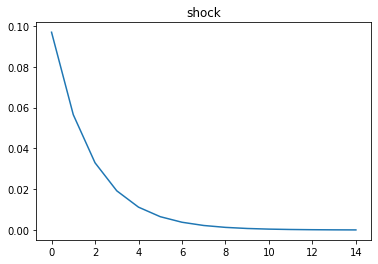

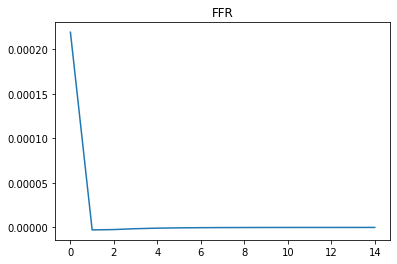

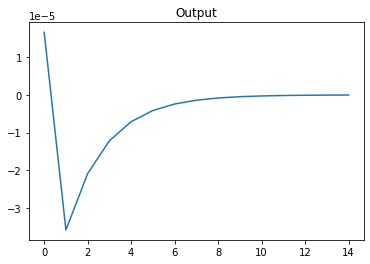

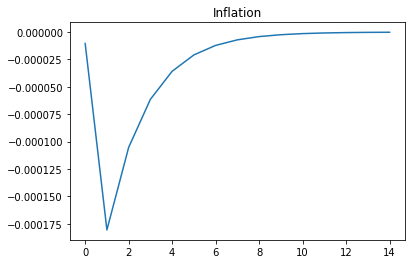

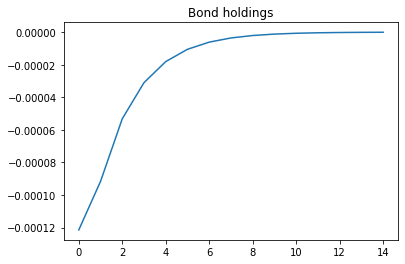

In [220]:
fig1, ax1, = plt.subplots() 
ax1.plot((U[shock1,:]))
ax1.set_title("shock")
fig2, ax2= plt.subplots()
ax2.plot((M[7]))
ax2.set_title("FFR")
fig3, ax3 = plt.subplots() 
ax3.plot((Y[0]))
ax3.set_title("Output")
fig4, ax4 = plt.subplots() 
ax4.plot((Y[1]))
ax4.set_title("Inflation")
fig5, ax5 = plt.subplots() 
ax5.plot((M[b_k]))
ax5.set_title("Bond holdings")


'''
fig5, ax5 = plt.subplots() 
ax5.plot(np.arange(T),  (Y[2]))
ax5.set_title("gov bond price")
ax5.set_xlabel("Time")
fig6, ax6 = plt.subplots() 
ax6.plot(np.arange(T),  (Y[3]))
ax6.set_title("corporate bond price")
ax6.set_xlabel("Time")
'''